## Objective

Comparative study of KNN and Decision tree for predicting Students Adaptability level in Online Education.

### Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


### Read Data

In [4]:
df = pd.read_csv('C:\\Users\\N_Star\\Desktop\\ATOMCAMP ASSIGNMENT\\hasnain.csv')

In [5]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [6]:
df.shape

(1205, 14)

In [7]:
print('The Number of Rows',df.shape[0])
print('The Number of Columns',df.shape[1])

The Number of Rows 1205
The Number of Columns 14


In [7]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [8]:
df.isnull().sum()*100/len(df)

Gender                 0.0
Age                    0.0
Education Level        0.0
Institution Type       0.0
IT Student             0.0
Location               0.0
Load-shedding          0.0
Financial Condition    0.0
Internet Type          0.0
Network Type           0.0
Class Duration         0.0
Self Lms               0.0
Device                 0.0
Adaptivity Level       0.0
dtype: float64

###  Data Profiling Report

In [8]:
df.describe(include='all')

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


# Encoding

Choose a suitable encoding technique for the columns.

In [51]:
categorical_cols = ['Gender','Age', 'Education Level', 'Institution Type', 'IT Student',
                     'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
                     'Network Type','Class Duration','Self Lms', 'Device', 'Adaptivity Level']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [52]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


### Check distribution

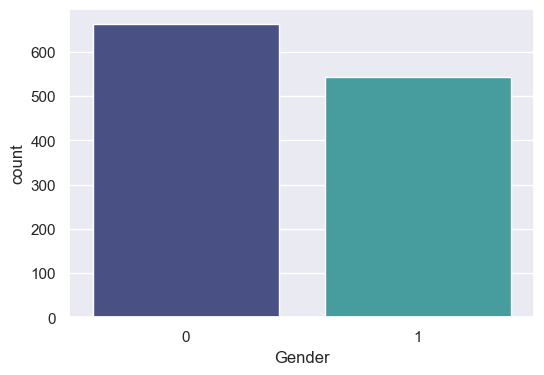

In [28]:
sns.set(rc={"figure.figsize":(6,4)})
sns.countplot(x="Gender",data=df,palette='mako')
plt.show()

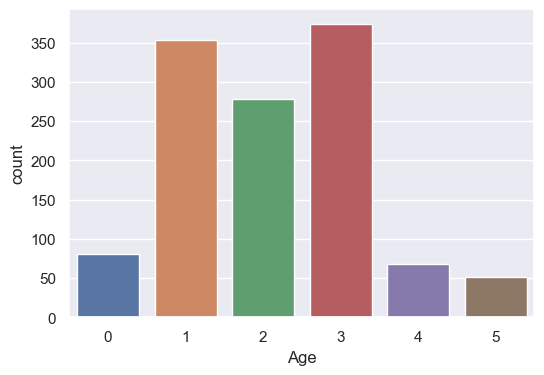

In [53]:
sns.countplot(x="Age",data=df)
plt.show()

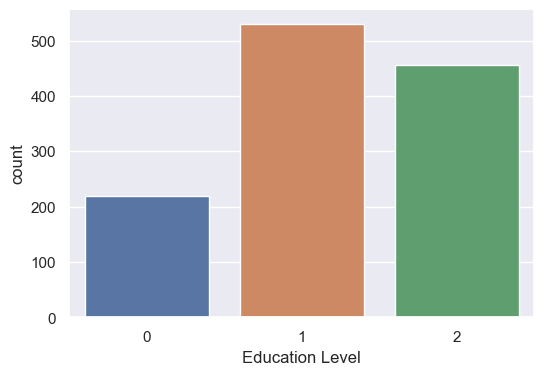

In [34]:
sns.countplot(x="Education Level",data=df )
plt.show()

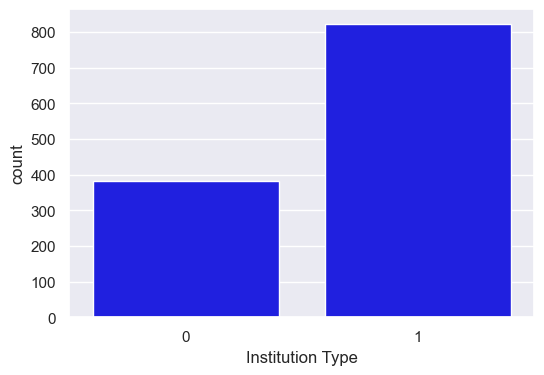

In [38]:
sns.countplot(x="Institution Type",data=df, color='blue' )
plt.show()

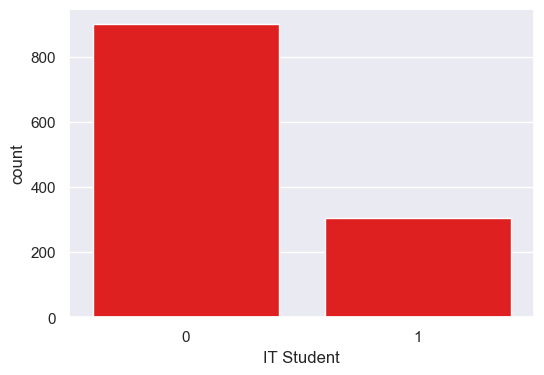

In [40]:
sns.countplot(x="IT Student",data=df, color='red' )
plt.show()

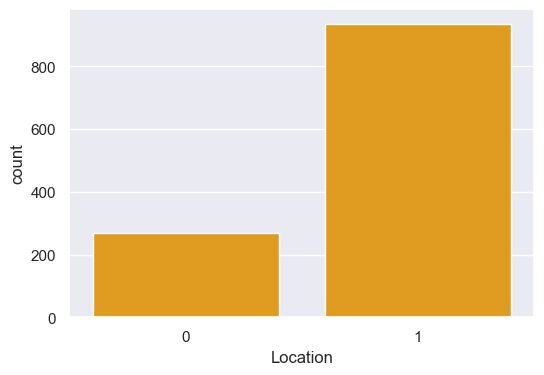

In [44]:
sns.countplot(x="Location",data=df, color='orange' )
plt.show()

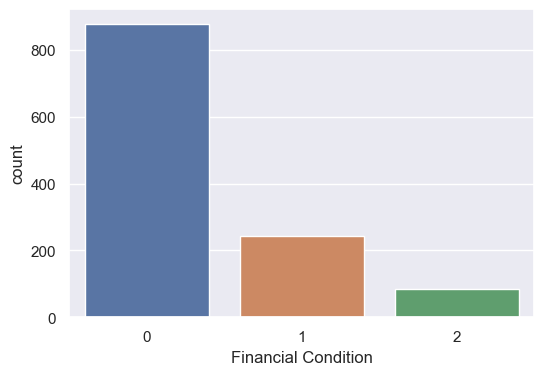

In [42]:
sns.countplot(x="Financial Condition",data=df )
plt.show()

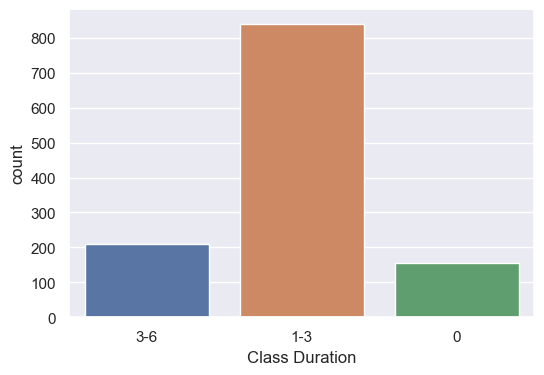

In [43]:
sns.countplot(x="Class Duration",data=df )
plt.show()

In [15]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

# Machine Learning Algorithms

Use KNN and Decision tree and find which one is working better.

### Define X and Y

In [54]:
X = df.drop('Adaptivity Level', axis=1)  # Assuming 'Adaptivity Level' is the target
y = df['Adaptivity Level']

### Feature Scaling

### Train Test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [62]:
# Simple KNN (default distance metric is Minkowski with p=2, equivalent to Euclidean)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.8008298755186722


#### Check different distance metric

**Euclidean**

In [60]:
# Euclidean distance
knn_euc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
y_pred_euc = knn_euc.predict(X_test)
euclidean_accuracy = accuracy_score(y_test, y_pred_euc)
print("KNN (Euclidean distance) accuracy:", euclidean_accuracy)


KNN (Euclidean distance) accuracy: 0.8008298755186722


**Manhattan**

In [61]:
# Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
manhattan_accuracy = accuracy_score(y_test, y_pred_manhattan)
print("KNN (Manhattan distance) accuracy:", manhattan_accuracy)

KNN (Manhattan distance) accuracy: 0.8049792531120332


# Decision Tree

**Using Entropy**

In [58]:
# Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
entropy_accuracy = accuracy_score(y_test, y_pred_entropy)
print("Decision Tree (Entropy) accuracy:", entropy_accuracy)


Decision Tree (Entropy) accuracy: 0.8921161825726142


**Use Gini Index**

In [59]:
# Gini index
dt_gini = DecisionTreeClassifier(criterion='gini')
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
gini_accuracy = accuracy_score(y_test, y_pred_gini)
print("Decision Tree (Gini index) accuracy:", gini_accuracy)

Decision Tree (Gini index) accuracy: 0.8921161825726142


# All the Best!